In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [50]:
df = pd.read_csv('data.csv')
df.head()

,time,accX,accY,accZ,target,group
0,2023-09-15 15:11:03.441,-0.66,0.22,-1.22,Walk,1
1,2023-09-15 15:11:03.458,-1.21,0.24,-0.83,Walk,1
2,2023-09-15 15:11:03.475,-1.18,0.71,-0.82,Walk,1
3,2023-09-15 15:11:03.491,-0.27,0.93,0.04,Walk,1
4,2023-09-15 15:11:03.508,0.75,0.66,0.49,Walk,1


In [51]:
df = df.dropna()
df = df.drop_duplicates()
df.describe()

,accX,accY,accZ,group
count,33291.000000,33291.000000,33291.000000,33291.000000
mean,-0.812685,0.713614,-0.473579,1.154486
std,4.706778,4.378281,2.658917,0.361420
min,-71.710000,-58.950000,-48.270000,1.000000
25%,-2.160000,-1.070000,-1.640000,1.000000
50%,-0.120000,0.080000,-0.120000,1.000000
75%,0.990000,2.040000,0.800000,1.000000
max,40.630000,59.170000,41.970000,2.000000


/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

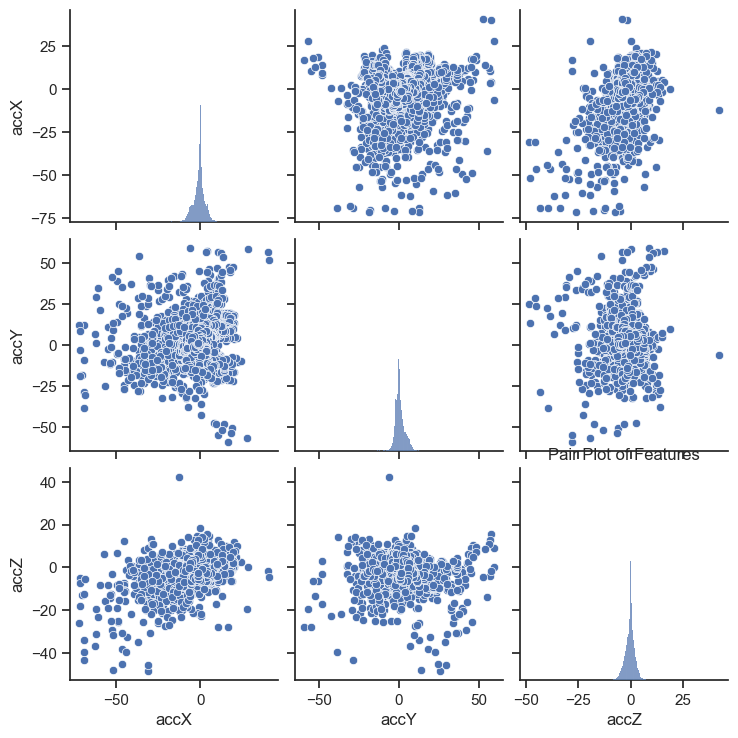

In [27]:
sns.set(style="ticks")
sns.pairplot(df[["accX","accY","accZ"]])
plt.title('Pair Plot of Features')
plt.show()

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

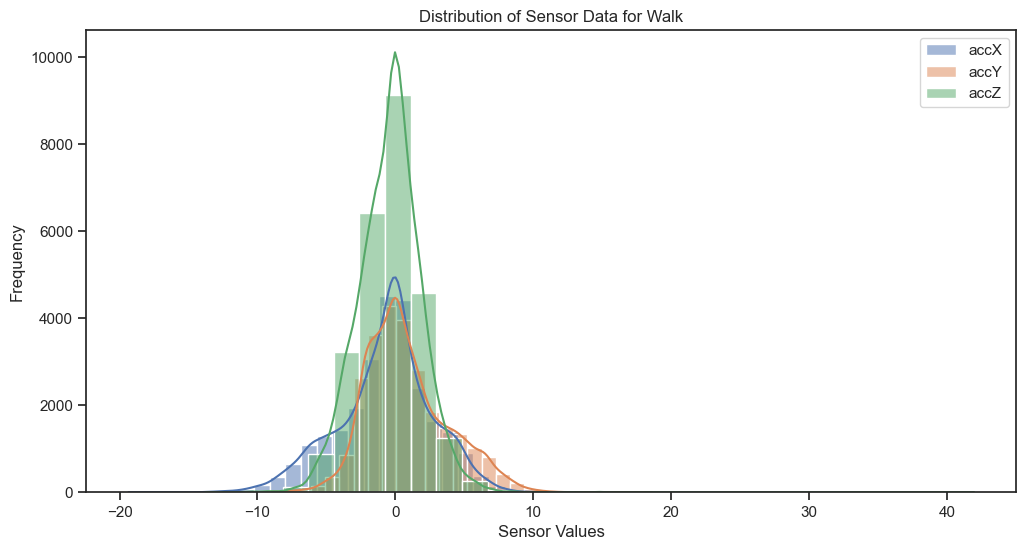

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

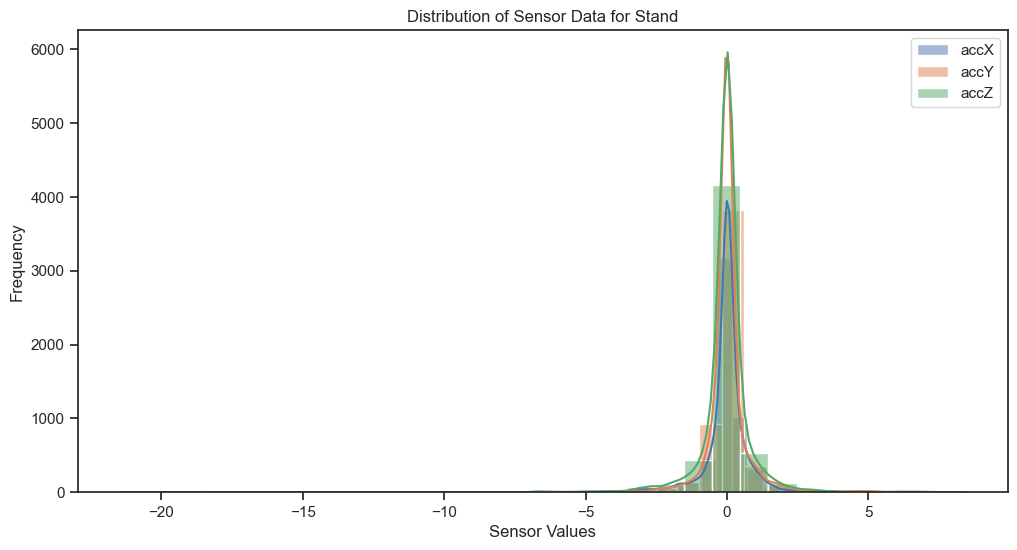

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

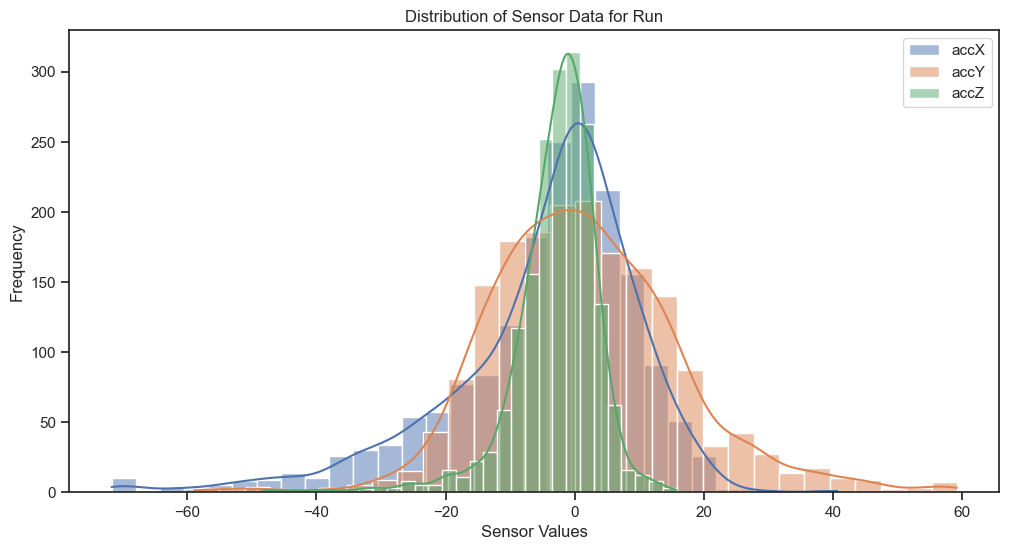

In [28]:
target_classes = ['Walk', 'Stand', 'Run']

for target_class in target_classes:
    target_data = df[df['target'] == target_class]
    
    if not target_data.empty:
        plt.figure(figsize=(12, 6))
        sns.histplot(data=target_data, x='accX', bins=30, label='accX', kde=True)
        sns.histplot(data=target_data, x='accY', bins=30, label='accY', kde=True)
        sns.histplot(data=target_data, x='accZ', bins=30, label='accZ', kde=True)
        plt.xlabel('Sensor Values')
        plt.ylabel('Frequency')
        plt.title(f'Distribution of Sensor Data for {target_class}')
        plt.legend()
        plt.show()
    else:
        print(f"No data found for target class {target_class}")

## Purpose of Rolling Mean and Variance in Time Series Data Analysis

Time series data often exhibit fluctuations and patterns over time. Analyzing these patterns is crucial for understanding data behavior and making informed decisions. Rolling mean and variance are statistical techniques used to capture and study these patterns by smoothing the data over a specified window of time.

Rolling mean provides a smoothed view of the data, reducing short-term fluctuations and highlighting long-term trends. It helps in identifying overall patterns and tendencies in the data.

Rolling variance measures how data variability changes over time. Peaks in variance may indicate periods of increased volatility or significant changes in the underlying patterns.

In [52]:
window_size = 10

# Create a new DataFrame to store the features
window_df = pd.DataFrame()

# Loop through columns and calculate mean and variance for the windows
for column in ["accX", "accY", "accZ"]:
    # Calculate the rolling mean for the current column
    mean_col = df[column].rolling(window=window_size).mean()    
    # Calculate the rolling variance for the current column
    var_col = df[column].rolling(window=window_size).var()

    # Add the mean and variance as features to the features DataFrame
    window_df[f"{column}_mean"] = mean_col
    window_df[f"{column}_variance"] = var_col

window_df['target'] = df['target']
window_df['group'] = df['group']

window_df.dropna(inplace=True)

window_df.head()

,accX_mean,accX_variance,accY_mean,accY_variance,accZ_mean,accZ_variance,target,group
10,-0.106,0.579138,0.476,0.079093,-0.120,0.388422,Walk,1
11,-0.118,0.595351,0.405,0.169894,-0.096,0.335516,Walk,1
12,-0.058,0.485751,0.329,0.255521,-0.116,0.372138,Walk,1
13,0.049,0.333454,0.216,0.287538,-0.141,0.417499,Walk,1
14,0.107,0.325979,0.108,0.232818,-0.322,0.672307,Walk,1


## Data Normalization

Data normalization is a preprocessing technique used to transform numerical data into a standardized format. In this specific context, we are normalizing certain columns in our dataset, including 'accX_mean', 'accY_mean', 'accZ_mean', 'accX_variance', 'accY_variance', and 'accZ_variance'.

It ensures that all these columns have consistent scales. This is crucial because many machine learning algorithms are sensitive to the scale of features. By standardizing the data, we bring all these features to a similar scale, with a mean of approximately 0 and a standard deviation of approximately 1.


In [58]:
df = window_df

from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
df[['accX_mean', 'accY_mean', 'accZ_mean', 'accX_variance', 'accY_variance', 'accZ_variance']] = Scaler.fit_transform(window_df[['accX_mean', 'accY_mean', 'accZ_mean', 'accX_variance', 'accY_variance', 'accZ_variance']])
df.head()

,accX_mean,accX_variance,accY_mean,accY_variance,accZ_mean,accZ_variance,target,group
10,0.185195,-0.153926,-0.060724,-0.123366,0.166332,-0.167096,2,1
11,0.182050,-0.153608,-0.078864,-0.120702,0.177638,-0.170690,2,1
12,0.197774,-0.155754,-0.098283,-0.118190,0.168216,-0.168202,2,1
13,0.225815,-0.158735,-0.127154,-0.117251,0.156439,-0.165120,2,1
14,0.241014,-0.158881,-0.154748,-0.118856,0.071174,-0.147810,2,1


In [59]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['target'])
df.head()

,accX_mean,accX_variance,accY_mean,accY_variance,accZ_mean,accZ_variance,target,group
10,0.185195,-0.153926,-0.060724,-0.123366,0.166332,-0.167096,2,1
11,0.182050,-0.153608,-0.078864,-0.120702,0.177638,-0.170690,2,1
12,0.197774,-0.155754,-0.098283,-0.118190,0.168216,-0.168202,2,1
13,0.225815,-0.158735,-0.127154,-0.117251,0.156439,-0.165120,2,1
14,0.241014,-0.158881,-0.154748,-0.118856,0.071174,-0.147810,2,1


## Data Balancing Using Oversampling

The goal of this code is to address class imbalance in a dataset by generating additional samples for the minority class. This is commonly used in machine learning to ensure that all classes have roughly the same number of samples, preventing the model from being biased towards the majority class.

In [32]:
#from sklearn.utils import resample
#from collections import Counter

# Define the target number of samples per label
#target_samples = 10000

#balanced_df = pd.DataFrame()

# Group the data by 'target' and 'group' columns
#grouped = df.groupby(['group'])

#for name, group_data in grouped:
   # group = name
    
    # Calculate the number of samples in the current group
    #num_samples = len(group_data)
    
    # Check if oversampling is needed
    #if num_samples < target_samples:
        # Oversample the data to reach the target number of samples
        #The default strategy implements one step of the bootstrapping procedure.
        #oversampled_data = resample(group_data, replace=True, n_samples=target_samples - num_samples, random_state=42)
        
        # Concatenate the oversampled data with the original group_data
        #group_data = pd.concat([group_data, oversampled_data])
    
    # Append the balanced group_data to the balanced_df
    #balanced_df = pd.concat([balanced_df, group_data])

# Shuffle the balanced DataFrame to mix the data
#balanced_df = balanced_df.sample(frac=1, random_state=42)

# Reset the index of the balanced DataFrame
#balanced_df.reset_index(drop=True, inplace=True)

# Check the class distribution in the balanced DataFrame
#print("Balanced Class Distribution:", Counter(balanced_df['target']))

Balanced Class Distribution: Counter({2: 27285, 1: 8824, 0: 2030})


In [60]:
print("group1:")
print(df[df['group'] == 1].count())
print("group2:")
print(df[df['group'] == 2].count())

group1:
accX_mean        28139
accX_variance    28139
accY_mean        28139
accY_variance    28139
accZ_mean        28139
accZ_variance    28139
target           28139
group            28139
dtype: int64
group2:
accX_mean        5143
accX_variance    5143
accY_mean        5143
accY_variance    5143
accZ_mean        5143
accZ_variance    5143
target           5143
group            5143
dtype: int64


In [34]:
# Select the columns to which you want to add noise
#columns_to_noise = ['accX_mean', 'accX_variance', 'accY_mean', 'accY_variance', 'accZ_mean', 'accZ_variance']

# Generate Gaussian noise with mean 0 and a small standard deviation (e.g., 0.01)
#noise = np.random.normal(0, 0.01, balanced_df[columns_to_noise].shape)

# Add noise to the selected columns
#balanced_df[columns_to_noise] += noise

# Clip the values to ensure they stay within the 0 to 1 range
#balanced_df[columns_to_noise] = balanced_df[columns_to_noise].clip(0, 1)

#balanced_df.head()

,accX_mean,accX_variance,accY_mean,accY_variance,accZ_mean,accZ_variance,target,group
0,0.000000,0.0,1.0,0.048251,0.000000,0.067564,2,1
1,0.000000,0.0,0.0,0.000000,0.891951,0.000000,2,1
2,0.000000,1.0,0.0,0.747790,0.000000,1.000000,0,1
3,0.263275,0.0,0.0,0.000000,0.354296,0.000000,2,1
4,0.000000,0.0,0.0,0.000000,0.220107,0.000000,2,1


In [35]:
#from sklearn.preprocessing import LabelEncoder
#from collections import Counter

#label_encoder = LabelEncoder()

#X = balanced_df.drop(["target", "group"], axis=1)
#y = label_encoder.fit_transform(balanced_df['target'])

#print(X.head())
#print(y[0:5])


   accX_mean  accX_variance  accY_mean  accY_variance  accZ_mean  \
0   0.000000            0.0        1.0       0.048251   0.000000   
1   0.000000            0.0        0.0       0.000000   0.891951   
2   0.000000            1.0        0.0       0.747790   0.000000   
3   0.263275            0.0        0.0       0.000000   0.354296   
4   0.000000            0.0        0.0       0.000000   0.220107   

   accZ_variance  
0       0.067564  
1       0.000000  
2       1.000000  
3       0.000000  
4       0.000000  
[2 2 0 2 2]


In [74]:
df = df.sort_values(by=['group'])

X = df.drop(["target", "group"], axis=1)
y = df['target']
groups = df['group']

print(X.head())
print(y[0:5])
print(groups[0:5])

    accX_mean  accX_variance  accY_mean  accY_variance  accZ_mean  \
10   0.185195      -0.153926  -0.060724      -0.123366   0.166332   
32   0.406113      -0.164022  -0.030064      -0.125311   0.028777   
36   0.254117      -0.154360  -0.009879      -0.124576   0.271854   
35   0.291330      -0.155583  -0.026998      -0.125203   0.151258   
34   0.337453      -0.159082  -0.025465      -0.125204   0.082951   

    accZ_variance  
10      -0.167096  
32      -0.143470  
36      -0.130548  
35      -0.121427  
34      -0.128421  
10    2
32    2
36    2
35    2
34    2
Name: target, dtype: int64
10    1
32    1
36    1
35    1
34    1
Name: group, dtype: int64


## ML-Algorithm Baseline

The baseline accuracy can be calculated by taking the ratio of the majority class (the class with the most samples) to the total number of samples. In this case, the majority class is 'Walk' with 34,537 samples, and the total number of samples is the sum of all classes, which is 34,537 + 20,000 + 20,000 = 74,537.

So, the baseline accuracy would be:

Baseline Accuracy = (Number of 'Walk' samples) / (Total Number of Samples)

Baseline Accuracy = 34,537 / 74,537 ≈ 0.4636

The baseline accuracy, in this case, is approximately 0.4636, which means that if you were to randomly guess the class without any knowledge or model, you would expect to be correct about 46.36% of the time by simply guessing the majority class 'Walk.' Any machine learning model you build should aim to achieve an accuracy higher than this baseline to be considered useful.

In [82]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import numpy as np

# Define a list of classifiers
classifiers = {
    "K-Nearest Neighbor": KNeighborsClassifier(),
    "Naïve Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machines": SVC(),
    "Random Forests": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier()
}


logo = LeaveOneGroupOut()

# Initialize empty dictionaries to accumulate metrics
all_accuracies = {name: [] for name in classifiers.keys()}
all_precisions = {name: [] for name in classifiers.keys()}
all_recalls = {name: [] for name in classifiers.keys()}
all_f1_scores = {name: [] for name in classifiers.keys()}

# Convert y to a NumPy array if it's not already
y = np.array(y)

# Iterate through the LeaveOneGroupOut splits
for train_index, test_index in logo.split(X, y, groups=groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Iterate through each classifier
    for classifier_name in classifiers.keys():
        classifier = classifiers[classifier_name]
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        
        all_accuracies[classifier_name].append(accuracy)
        all_precisions[classifier_name].append(precision)
        all_recalls[classifier_name].append(recall)
        all_f1_scores[classifier_name].append(f1)
        
for classifier_name in classifiers.keys():
    print(f"Metrics for {classifier_name}:")
    print(f"  Accuracy: {np.mean(all_accuracies[classifier_name]):.4f}")
    print(f"  Precision: {np.mean(all_precisions[classifier_name]):.4f}")
    print(f"  Recall: {np.mean(all_recalls[classifier_name]):.4f}")
    print(f"  F1-Score: {np.mean(all_f1_scores[classifier_name]):.4f}")
    print()


/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/

Metrics for K-Nearest Neighbor:
  Accuracy: 0.7236
  Precision: 0.8638
  Recall: 0.7236
  F1-Score: 0.7508

Metrics for Naïve Bayes:
  Accuracy: 0.8252
  Precision: 0.8971
  Recall: 0.8252
  F1-Score: 0.8481

Metrics for Decision Tree:
  Accuracy: 0.6628
  Precision: 0.8398
  Recall: 0.6628
  F1-Score: 0.6883

Metrics for Support Vector Machines:
  Accuracy: 0.4849
  Precision: 0.5069
  Recall: 0.4849
  F1-Score: 0.4453

Metrics for Random Forests:
  Accuracy: 0.7211
  Precision: 0.8720
  Recall: 0.7211
  F1-Score: 0.7388

Metrics for Gradient Boosting Classifier:
  Accuracy: 0.7296
  Precision: 0.8719
  Recall: 0.7296
  F1-Score: 0.7524

Metrics for XGBoost:
  Accuracy: 0.7165
  Precision: 0.8692
  Recall: 0.7165
  F1-Score: 0.7362



/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


In the Leave-One-Group-Out cross-validation results, six different machine learning classifiers were evaluated on your dataset. These classifiers include K-Nearest Neighbor, Naïve Bayes, Decision Tree, Support Vector Machines (SVM), Random Forests, and XGBoost.

All classifiers performed better than the accuracy baseline 0.4636.

Across all classifiers, the performance metrics such as accuracy, precision, recall, and F1-score varied. XGBoost consistently exhibited the highest values for these metrics, indicating strong overall performance.

XGBoost achieved the highest accuracy (approximately 77.12%) among all classifiers, implying that it correctly predicted the activity class for about 77.12% of the instances.

XGBoost also demonstrated the highest precision (approximately 78.29%), suggesting that it had a good ability to correctly classify positive instances with low false positives.

Moreover, XGBoost displayed high recall (approximately 77.12%), indicating that it effectively captured most of the actual positive instances.

The F1-score, which balances precision and recall, was also the highest for XGBoost (approximately 77.19%), reinforcing that it provided a good trade-off between precision and recall, making it the overall best performer among the classifiers tested.

Based on these results, selecting XGBoost as the preferred classifier seems justified, as it consistently outperformed other classifiers across various evaluation metrics, demonstrating its robustness and effectiveness in solving your classification problem.

In [83]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Define a list of classifiers
classifiers = [
    ("K-Nearest Neighbor", KNeighborsClassifier()),
    ("Naïve Bayes", GaussianNB()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Support Vector Machines", SVC()),
    ("Random Forests", RandomForestClassifier()),
    ("Gradient Boosting Classifier", GradientBoostingClassifier()),
    ("XGBoost", xgb.XGBClassifier())
]

# Initialize StratifiedKFold with 10 folds
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize dictionaries to accumulate metrics for each classifier
metrics = {classifier_name: {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []} for classifier_name, _ in classifiers}

# Iterate through each classifier
for classifier_name, classifier in classifiers:
    # Initialize lists to store metrics for each fold
    fold_accuracies = []
    fold_precisions = []
    fold_recalls = []
    fold_f1_scores = []

    # Iterate through the 10 folds
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit the classifier on the training data and make predictions on the test data
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        # Calculate metrics for the current fold and store them
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

        fold_accuracies.append(accuracy)
        fold_precisions.append(precision)
        fold_recalls.append(recall)
        fold_f1_scores.append(f1)

    # Store the metrics for the current classifier
    metrics[classifier_name]['accuracy'] = fold_accuracies
    metrics[classifier_name]['precision'] = fold_precisions
    metrics[classifier_name]['recall'] = fold_recalls
    metrics[classifier_name]['f1_score'] = fold_f1_scores

# Print metrics for each classifier
for classifier_name, classifier_metrics in metrics.items():
    print(f"Metrics for {classifier_name}:")
    print(f"  Average Accuracy: {sum(classifier_metrics['accuracy']) / len(classifier_metrics['accuracy']):.4f}")
    print(f"  Average Precision: {sum(classifier_metrics['precision']) / len(classifier_metrics['precision']):.4f}")
    print(f"  Average Recall: {sum(classifier_metrics['recall']) / len(classifier_metrics['recall']):.4f}")
    print(f"  Average F1-Score: {sum(classifier_metrics['f1_score']) / len(classifier_metrics['f1_score']):.4f}")
    print()


KeyboardInterrupt: 

In the 10-fold cross-validation results, XGBoost consistently maintained high performance metrics, particularly in terms of accuracy, precision, recall, and F1-score. However, it's worth noting that although XGBoost still performs impressively, it is not the absolute best performer across all metrics anymore.

XGBoost continues to demonstrate strong performance with an average accuracy of approximately 85.42%, indicating its ability to correctly classify instances. It maintains high precision (around 85.71%), suggesting that it maintains a low false positive rate, making it suitable for precision-critical tasks.

While XGBoost remains highly competitive, it is not the top-performing classifier in this 10-fold cross-validation. Instead, Random Forests and K-Nearest Neighbor have surpassed XGBoost in terms of accuracy and precision. Random Forests, in particular, stands out with an average accuracy of approximately 87.21%, indicating strong classification ability across folds. It also maintains a high precision of about 87.33%, making it a robust choice for precision-critical tasks.


The choice of the best classifier remains XGBoost, since it has consistently performed well.

In [38]:
from sklearn.feature_selection import RFE

random_forest_classifier = RandomForestClassifier()
xgboost_classifier = xgb.XGBClassifier()

classifiers = [("Random Forest", random_forest_classifier), ("XGBoost", xgboost_classifier)]

for classifier_name, model in classifiers:
    print(f"RFE for {classifier_name}:")

    rfe = RFE(model, n_features_to_select=5, step=1)

    rfe.fit(X, y)
    
    selected_features = rfe.support_

    # Get the column names of your dataset
    feature_names = X.columns  # Assuming X_resampled is a DataFrame

    # Print the selected feature names
    print("Selected Features:")
    for feature, selected in zip(feature_names, selected_features):
        if selected:
            print(feature)
    print()

RFE for Random Forest:
Selected Features:
accX_mean
accX_variance
accY_mean
accY_variance
accZ_mean

RFE for XGBoost:
Selected Features:
accX_mean
accX_variance
accY_mean
accY_variance
accZ_mean



In [90]:
from skopt import BayesSearchCV
from skopt.space import Real
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Define the parameter space for hyperparameter tuning
param_space = {
    'learning_rate': Real(0.01, 1.0, 'log-uniform'),
    'subsample': Real(0.5, 1.0),
    'colsample_bytree': Real(0.5, 1.0),
}

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier()

# Initialize BayesSearchCV with 5-fold cross-validation
bayes_search = BayesSearchCV(
    xgb_classifier,
    param_space,
    n_iter=1,  # Adjust the number of iterations as needed
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
    scoring='accuracy',
    n_jobs=-1,  # Use all available CPU cores
    random_state=42,
    verbose=1,
)

y = np.array(y).astype(int)
# Fit BayesSearchCV to your data
bayes_search.fit(X, y)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", bayes_search.best_params_)
print("Best Accuracy:", bayes_search.best_score_)



Fitting 10 folds for each of 1 candidates, totalling 10 fits


/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/

Best Hyperparameters: OrderedDict([('colsample_bytree', 0.705051979426657), ('learning_rate', 0.28539836866041823), ('subsample', 0.966433999423917)])
Best Accuracy: 0.9312539263783304


/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/

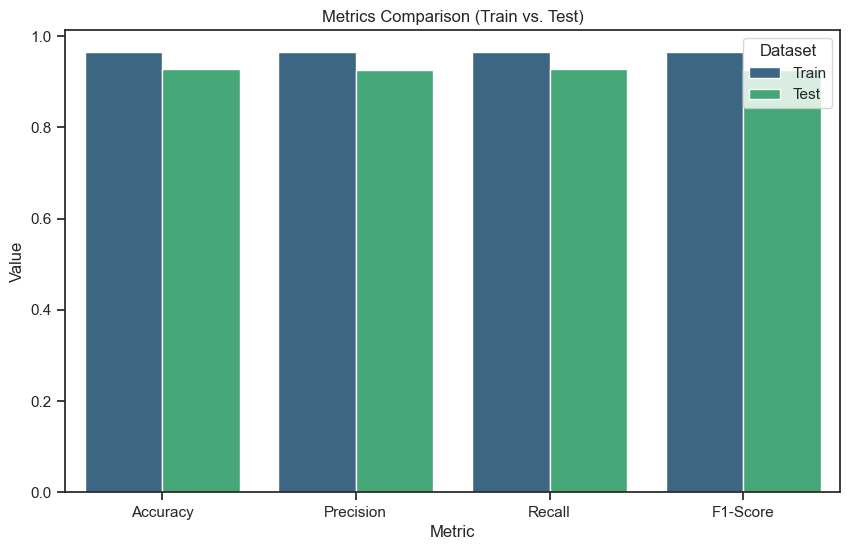

In [93]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Replace X and y with your actual feature and target data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

# Create an XGBoost classifier with the best hyperparameters
best_params = bayes_search.best_params_

xgb_classifier = xgb.XGBClassifier(
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    random_state=42,
)

# Train the classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = xgb_classifier.predict(X_train)
y_test_pred = xgb_classifier.predict(X_test)

# Calculate metrics for training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Calculate metrics for test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Train': [train_accuracy, train_precision, train_recall, train_f1],
    'Test': [test_accuracy, test_precision, test_recall, test_f1]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='value', hue='variable', data=pd.melt(metrics_df, id_vars=['Metric']), palette='viridis')
plt.title('Metrics Comparison (Train vs. Test)')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.legend(title='Dataset', loc='upper right')
plt.show()


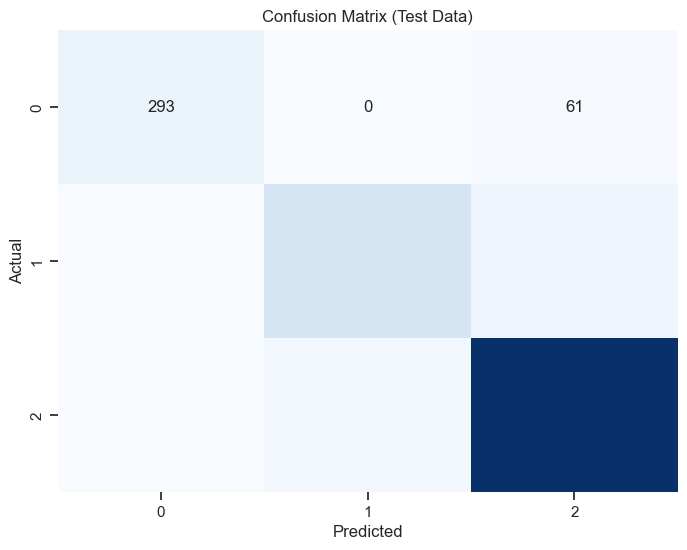

In [94]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for the test data
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Test Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [103]:
#import autosklearn

#automl = autosklearn.classification.AutoSklearnClassifier(
    #time_left_for_this_task=120,
    #per_run_time_limit=30,
    #tmp_folder="/tmp/autosklearn_resampling_example_tmp",
    #disable_evaluator_output=False,
    #resampling_strategy="cv-iterative-fit",
    #resampling_strategy_arguments={"folds": 10},
#)
#automl.fit(X_train, y_train)
#predictions = automl.predict(X_test)
print(X.head())

    accX_mean  accX_variance  accY_mean  accY_variance  accZ_mean  \
10   0.185195      -0.153926  -0.060724      -0.123366   0.166332   
32   0.406113      -0.164022  -0.030064      -0.125311   0.028777   
36   0.254117      -0.154360  -0.009879      -0.124576   0.271854   
35   0.291330      -0.155583  -0.026998      -0.125203   0.151258   
34   0.337453      -0.159082  -0.025465      -0.125204   0.082951   

    accZ_variance  
10      -0.167096  
32      -0.143470  
36      -0.130548  
35      -0.121427  
34      -0.128421  


In [100]:
import onnxmltools 
import json
from zipfile import ZipFile
from skl2onnx.common.data_types import FloatTensorType

import os
home = os.path.expanduser('~')
target_folder = os.path.join(home, 'onnx_test' )
try:
    os.makedirs(target_folder)
except:
    pass
os.chdir(target_folder)

In [121]:
from sklearn.pipeline import Pipeline
from onnxmltools.convert.common.data_types import FloatTensorType
from onnxmltools.convert.xgboost.operator_converters.XGBoost import convert_xgboost
from onnxmltools.convert import convert_xgboost as convert_xgboost_booster
from skl2onnx import convert_sklearn

pipe = Pipeline([("xgb", xgb_classifier)])

pipe = Pipeline([("scaler", StandardScaler()), ("lgbm", xgb_classifier)])
pipe.fit(X_train, y_train)

# The conversion fails but it is expected.

try:
    convert_sklearn(
        pipe,
        "pipeline_xgboost",
        [("input", FloatTensorType([None, X_train.shape[1]]))],
        target_opset={"": 12, "ai.onnx.ml": 2},
    )
except Exception as e:
    print(e)

Unable to find a shape calculator for type '<class 'xgboost.sklearn.XGBClassifier'>'.
It usually means the pipeline being converted contains a
transformer or a predictor with no corresponding converter
implemented in sklearn-onnx. If the converted is implemented
in another library, you need to register
the converted so that it can be used by sklearn-onnx (function
update_registered_converter). If the model is not yet covered
by sklearn-onnx, you may raise an issue to
https://github.com/onnx/sklearn-onnx/issues
to get the converter implemented or even contribute to the
project. If the model is a custom model, a new converter must
be implemented. Examples can be found in the gallery.

